Все импорты должны выполняться, особенно если вы запускаете это внутри докера

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
style.use('dark_background')
from IPython.display import clear_output
from copy import copy, deepcopy
from tqdm import tqdm_notebook as tm
from tqdm import trange
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
import os
import sys
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import pandas.io.sql as psql

Вспомогательные функции для запроса данных из базы

In [4]:
def get_conn():
    import psycopg2 as pg
    return pg.connect("dbname=vk_data user=vk_parser password=WegEWWXfedLf2YbS host=13.84.188.132")

def run_sql(query):
    import pandas.io.sql as psql
    res = psql.read_sql(query, get_conn())
    try:
        return res.set_index('uid')
    except:
        import warnings
        warnings.warn("[run_sql] UID wasn't selected, default index used")
        return res

def get_uid():
    return run_sql("SELECT uid FROM users WHERE data_loaded")

In [6]:
# Всего у нас вот столько таблиц

run_sql("""SELECT table_name FROM information_schema.tables WHERE table_schema = 'public'""")

,table_name
0,groups
1,likes
2,posts
3,users_friends
4,users_groups
5,users


In [7]:
run_sql("Select * FROM users where data_loaded limit 100")

,first_name,last_name,sex,nickname,domain,bdate,city,country,photo_50,photo_100,photo_200_orig,can_write_private_message,status,data_loaded,mobile_phone,home_phone,group_list_loaded,comments_loaded,is_leader
uid,,,,,,,,,,,,,,,,,,,
995485,Роза ...,Шигабутдинова,1,,id995485,,1,1,https://pp.userapi.com/c849136/v849136038/154f...,https://pp.userapi.com/c849136/v849136038/154f...,https://pp.userapi.com/c849136/v849136038/154f...,1,,True,,,True,True,0
1115840,Катя ...,Осипова,1,(Рыбакова),id1115840,,1,1,https://pp.userapi.com/c621927/v621927840/34ab...,https://pp.userapi.com/c621927/v621927840/34ab...,https://pp.userapi.com/c621927/v621927840/34ab...,0,"В ожидание крепчает характер, слабеет надежда ...",True,,,True,True,0
1315096,Анна ...,Фицева,1,,ficeva,21.5,1,1,https://pp.userapi.com/c1618/u1315096/e_76bc2b...,https://pp.userapi.com/c1618/u1315096/d_ebb139...,https://pp.userapi.com/c1618/u1315096/a_2a2ce3...,1,,True,,,True,True,0
1349356,Аким ...,Люльков,2,,id1349356,12.7.1990,16972,1,https://pp.userapi.com/c637118/v637118356/392b...,https://pp.userapi.com/c637118/v637118356/392b...,https://pp.userapi.com/c637118/v637118356/392b...,1,и пусть задумается враг...,True,,,True,True,0
1397615,Виктория ...,Баранова,1,,baranova_viktoria,2.8,1,1,https://sun9-1.userapi.com/c845017/v845017086/...,https://pp.userapi.com/c845017/v845017086/2068...,https://pp.userapi.com/c845017/v845017086/2068...,1,"У людей внутри чертовы галактики, а вы их по в...",True,,,True,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238186536,Наташа ...,Горовец,1,,nata_gorovets,1.10.1985,1,1,https://pp.userapi.com/c852220/v852220201/f611...,https://pp.userapi.com/c852220/v852220201/f611...,https://pp.userapi.com/c852220/v852220201/f611...,0,,True,,,True,True,0
369870,Кристина ...,Зайцева,1,,id369870,4.5,0,0,https://pp.userapi.com/c636724/v636724870/2478...,https://pp.userapi.com/c636724/v636724870/2478...,https://pp.userapi.com/c636724/v636724870/2478...,0,http://instagram.com/zaykakristina,True,,,True,True,0
521862,Александр ...,Жилин,2,,id521862,9.6,49,1,https://pp.userapi.com/c637830/v637830862/47ff...,https://pp.userapi.com/c637830/v637830862/47ff...,https://pp.userapi.com/c637830/v637830862/47ff...,1,,True,,,True,True,0


In [9]:
users = run_sql("""Select uid, first_name, last_name, sex, is_leader 
                FROM users 
                where data_loaded and group_list_loaded and comments_loaded""")

users.to_csv('../data/raw_data/users.csv', index=True)

In [ ]:
run_sql("""Select * 
           FROM groups 
           limit 5""")

In [ ]:
df = run_sql("""Select gid, name, screen_name 
                FROM groups 
                where is_closed = 0""")

df.to_csv('../data/raw_data/groups.csv', index=False)

In [ ]:
run_sql("""Select * 
           FROM likes 
           limit 5""")

In [ ]:
df = run_sql("""Select owner_id, user_id 
                FROM likes""")

df = df.groupby('owner_id', as_index=False).agg('count')
df.to_csv('../data/raw_data/likes.csv', index=False)

In [ ]:
run_sql("""Select * 
           FROM users_friends 
           limit 5""")

In [ ]:
df = run_sql("""Select uid1, count(uid2) 
                FROM users_friends
                group by uid1""")


In [ ]:
df.to_csv('../data/raw_data/friends.csv', index=False)

In [ ]:
run_sql("""Select * 
           FROM users_groups 
           limit 5""")

In [ ]:
df = run_sql("""Select * 
                FROM users_groups 
             """)

In [ ]:
df.to_csv('../data/raw_data/users_groups.csv', index=False)

In [ ]:
run_sql("""Select * 
           FROM posts
           where text <> ''
           limit 5
        """)

In [27]:
from tqdm import tqdm

total = 8982138
def dict2int(x):
    return x['count']

# posts = []

# for i in tqdm(range((total//1000000) + 1)):

#     df = run_sql("""Select from_id, owner_id, text, comments, likes, reposts
#                     FROM posts
#                     where text <> '' and likes_loaded
#                     limit 1000000 offset {}
#                  """.format(i*1000000))

#     df['comments'] = df['comments'].apply(dict2int).astype(np.int32)
#     df['likes'] = df['likes'].apply(dict2int).astype(np.int32)
#     df['reposts'] = df['reposts'].apply(dict2int).astype(np.int32)
#     posts.append(df)

# df = pd.concat(posts).drop_duplicates()
# df.to_csv('../data/raw_data/posts.csv', index=False)

In [ ]:
df

In [ ]:
df = pd.concat(posts)
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

In [ ]:
df.iloc[df.comments.argmax()].text

In [ ]:
df.shape

In [ ]:
df.to_csv('../data/raw_data/posts_1kk.csv', index=False)

In [ ]:
# from psycopg2 import sql

# conn = get_conn()
# cur = conn.cursor()

# cur.execute(
#     sql.SQL("ALTER TABLE {} DROP COLUMN is_leader")
#         .format(sql.Identifier('users')))
# conn.commit()



In [ ]:
# # Добавляем новую колонку напрямую в базу


# from psycopg2 import sql

# conn = get_conn()
# cur = conn.cursor()

# cur.execute(
#     sql.SQL("ALTER TABLE {} ADD COLUMN is_leader INT")
#         .format(sql.Identifier('users')))
# conn.commit()


In [ ]:
# # Допустим теперь для каждого юзера у нас появились предсказания, запишем их в сабмишн файл 

# ids = get_uid()
# leaders = np.random.choice(list(ids.index), size=100)


# submission = pd.DataFrame({'is_leader':np.zeros(ids.shape[0])}, index=ids.index)
# submission.loc[leaders] = 1

# submission.to_csv('../data/submission/random_submission.csv')

In [ ]:
# # Обновляем колонку в базе 
# # Так делать не нужно, код для Андрея
# from tqdm import tqdm

# conn = get_conn()
# cur = conn.cursor()

# cur.execute(
#         sql.SQL("""UPDATE {} SET is_leader = 0""")
#     .format(sql.Identifier('users'))
# )

# leaders = submission[submission['is_leader'] == 1]
# for uid, is_leader in tqdm(zip(leaders.index, leaders['is_leader'])):
#     cur.execute(
#         sql.SQL("""UPDATE {}
#                 SET is_leader = %s
#                 WHERE
#                    uid = %s;
#                 """)
#             .format(sql.Identifier('users')),
#         [int(is_leader), uid])
# conn.commit()


# Smol eda

In [6]:
tables = run_sql("""SELECT table_name FROM information_schema.tables WHERE table_schema = 'public'""").table_name.tolist()

In [7]:
for t in tables:
    print(t + ':' + run_sql("Select * FROM {} LIMIT 0".format(t)).columns)

Index(['groups:gid', 'groups:name', 'groups:screen_name', 'groups:is_closed',
       'groups:type', 'groups:photo', 'groups:photo_medium',
       'groups:photo_big'],
      dtype='object')
Index(['likes:id', 'likes:owner_id', 'likes:user_id'], dtype='object')
Index(['posts:id', 'posts:from_id', 'posts:owner_id', 'posts:date',
       'posts:post_type', 'posts:text', 'posts:post_source', 'posts:comments',
       'posts:is_favorite', 'posts:likes', 'posts:reposts',
       'posts:copy_history', 'posts:attachments', 'posts:likes_loaded'],
      dtype='object')
Index(['users_friends:uid1', 'users_friends:uid2'], dtype='object')
Index(['users_groups:gid'], dtype='object')
Index(['users:first_name', 'users:last_name', 'users:sex', 'users:nickname',
       'users:domain', 'users:bdate', 'users:city', 'users:country',
       'users:photo_50', 'users:photo_100', 'users:photo_200_orig',
       'users:can_write_private_message', 'users:status', 'users:data_loaded',
       'users:mobile_phone', 'use

In [8]:
friends = []
for i in tqdm(range((total//1000000) + 1)):
    df = run_sql("""Select * FROM users_friends limit 1000000 offset {}""".format(i*1000000))
    friends.append(df)
    
users_friends = pd.concat(friends).drop_duplicates()

NameError: name 'tqdm' is not defined

In [31]:
import networkx as nx

In [32]:
G = nx.from_edgelist(users_friends.to_records(index=False))

In [5]:
print(2*G.number_of_nodes()/G.number_of_edges()**2)

NameError: name 'G' is not defined

In [34]:
connected = list(nx.connected_component_subgraphs(G))

In [ ]:
len(connected)

In [ ]:
[len(c) for c in connected]

In [ ]:
for c in connected[1:]:
    print(c)

In [40]:
nontrivial = connected[1:]

In [35]:
def draw_(Gk, pos, metrics, rescale_metrics=True):
    def rescale_log(weigths_list):
        cutoff = 1e-20
        for _ in range(len(weigths_list)):
            if weigths_list[_] < cutoff:
                weigths_list[_] = cutoff
        return 1/(np.log(np.array(weigths_list)))
    if rescale_metrics:
        metrics = rescale_log(metrics)
    norm = 1000/np.max(metrics)
    options = {
    'with_labels':True,
    'node_color': [v * norm for v in metrics],
    'node_size': [v * norm for v in metrics],
    'line_color': 'grey',
    'linewidths': 0.5,
    'width': 0.5,
    'cmap': 'YlGnBu',
    'with_labels':True
    }
    nx.draw(Gk, pos, **options)

In [41]:
G_c = max(nontrivial, key=lambda x : len(x))
pos = nx.spring_layout(G_c, iterations=200)

AttributeError: module 'matplotlib.pyplot' has no attribute 'ishold'

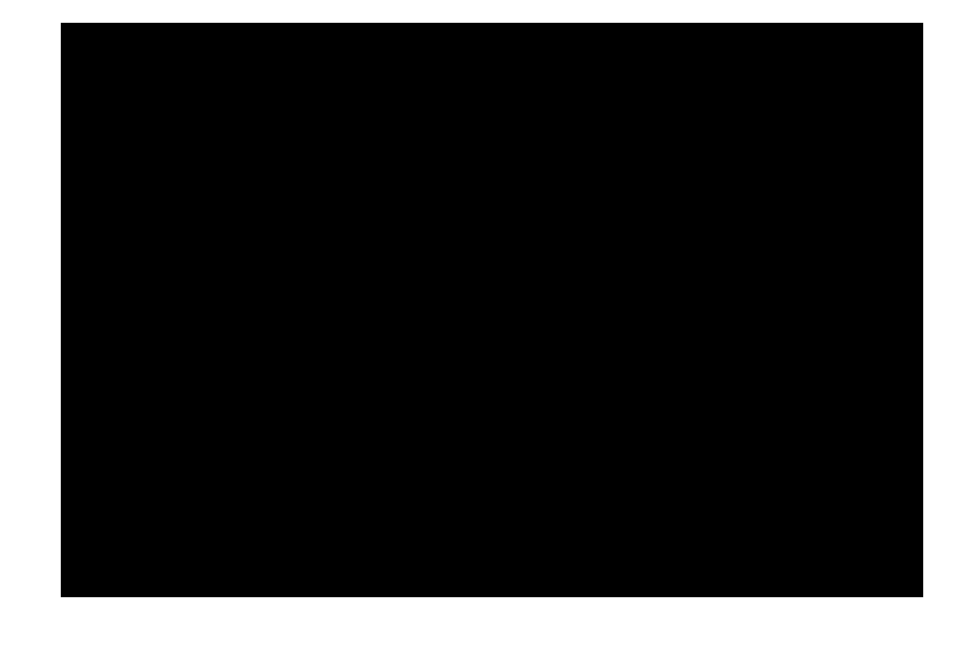

In [42]:
draw_(G_c, pos, metrics=np.ones(shape=(len(G_c),), dtype=np.float64))